### Load cifar10 Dataset and Libraries

In [220]:
import tensorflow as tf;
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import pickle

cifar10 = tf.keras.datasets.cifar10

In [221]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Add more Car Images to Dataset

We are appending more cars to the dataset to give the model more images of what to look for
so that it can be more accurate in its predictions. It will help in the training of the 
model.

In [222]:
images = open("train.pkl", "rb")
car_images = pickle.load(images)
car_labels = np.empty([8144, 1])
for i in range(8144):
    car_labels[i][0] = 1

images.close()

In [223]:
print("Car Data: ", car_images.shape, "\nCar Labels: ", car_labels.shape)

Car Data:  (8144, 32, 32, 3) 
Car Labels:  (8144, 1)


Add the Car Data to the Training set

In [224]:
train_images = np.concatenate((train_images, car_images))
train_labels = np.concatenate((train_labels, car_labels)) 

In [225]:
print("Train data: ", train_images.shape, "\nTrain Labels: ", train_labels.shape)

Train data:  (58144, 32, 32, 3) 
Train Labels:  (58144, 1)


In [226]:
# Seperating to either a car or not a car
class_names = ['NOT vehicle', 'vehicle']

# Change data set to only have 2 labels
for i in range(50000):
    if train_labels[i][0] not in {1, 9}:
        train_labels[i][0] = 0
    else:
        train_labels[i][0] = 1
        
for i in range(10000):
    if test_labels[i][0] not in {1, 9}:
        test_labels[i][0] = 0
    else:
        test_labels[i][0] = 1

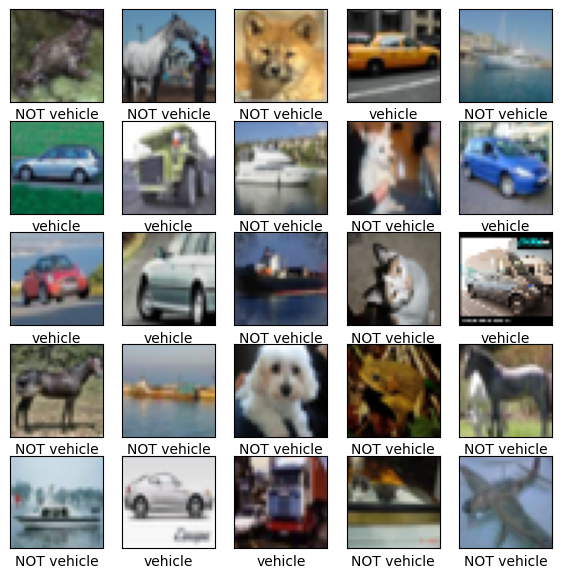

In [227]:
plt.figure(figsize=(7,7))
for i in range(25):
    random_image = random.randint(1,58144)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_image])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[int(train_labels[random_image][0])])
plt.show()

In [228]:
# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Preprocessing: Flatten the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Flatten the labels
train_labels = train_labels.ravel()
test_labels = test_labels.ravel()

# Create a subset for development to avoid long training time
subset_size = 10000

# Randomly select indices for the subset
subset_indices = np.random.choice(len(train_images), subset_size, replace=False)

# Create the subset
sub_train_images = train_images[subset_indices]
sub_train_labels = train_labels[subset_indices]

## Make Random Forest Model and Fit the Model

In [229]:
# Define the Random Forest classifier
'The hyper parameters come from a GridSearch done of the model'
rand_f_model = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_leaf=1, min_samples_split=2)

# Train the classifier
rand_f_model.fit(sub_train_images, sub_train_labels)

RandomForestClassifier(n_estimators=300, random_state=42)

## Predictions on the Test Set and Accuracy

In [230]:
# Make predictions on the test set
predict_label = rand_f_model.predict(test_images)

# Evaluate the model
accuracy = accuracy_score(test_labels, predict_label)
print("Accuracy: ", accuracy)

Accuracy:  0.8651


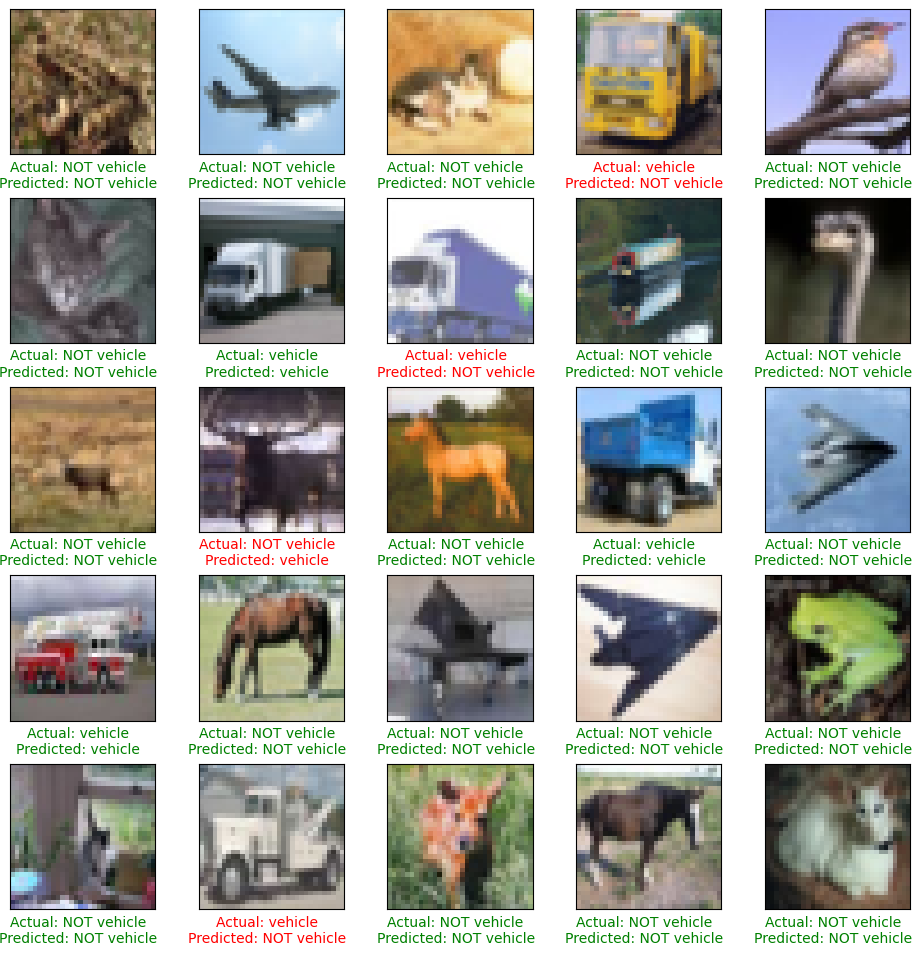

In [242]:
plt.figure(figsize=(10, 10))
for i in range(25):
    random_image = random.randint(1, 10000)
    
    # Plot the image
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_image].reshape(32, 32, 3))
    
    # Get the correct and predicted labels
    correct_label = class_names[test_labels[random_image]]
    predicted_label = class_names[int(predict_label[random_image])]
    
    # Determine label color based on correctness
    label_color = 'green' if correct_label == predicted_label else 'red'
    
    # Display labels with a space after each label
    plt.xlabel(f'Actual: {correct_label}  \nPredicted: {predicted_label}  ', color=label_color)

# Adjust spacing between subplots
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

plt.show()

## Predicting on Custom Images

In [243]:
images = open("output.pkl", "rb")

dev_images = pickle.load(images)

images.close()

# Normalize pixel values
dev_images = dev_images / 255.0

# Preprocessing: Flatten the images
dev_images = dev_images.reshape(dev_images.shape[0], -1)

In [244]:
dev_pred_label = rand_f_model.predict(dev_images)

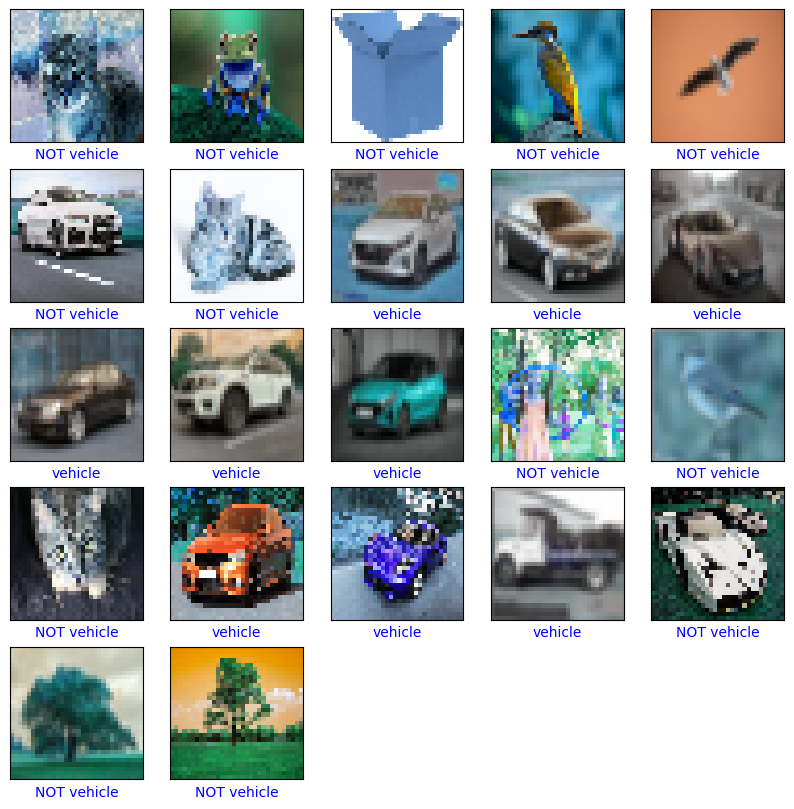

In [245]:
plt.figure(figsize=(10,10))
for i in range(22):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dev_images[i].reshape(32, 32, 3))  # Reshape images to (32, 32, 3)
    # plt.xlabel(class_names[int(dev_pred_label[i])])  # Use predicted labels
    
    
     # Determine label color based on correctness
    label_color = 'blue'
    
    # Display labels with a space after each label
    plt.xlabel(class_names[int(dev_pred_label[i])], color=label_color)
    
plt.show()

In [246]:
# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],        # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
#     'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
# }

# # Instantiate the grid search with the Random Forest classifier and the parameter grid
# grid_search = GridSearchCV(rand_f_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs = 4)

# # Perform the grid search on the training data
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found
# print("Best Hyperparameters:", grid_search.best_params_)

# # Get the best model
# best_rnd_clf = grid_search.best_estimator_

# # Make predictions on the test set using the best model
# y_pred_best = best_rnd_clf.predict(X_test)

# # Calculate accuracy of the best model
# accuracy_best = accuracy_score(y_test, y_pred_best)
# print("Accuracy of the best model:", accuracy_best)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best model: 0.858